<a href="https://colab.research.google.com/github/ghatanisuresh/DataScience_tutorial/blob/main/PractiseDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# European Education Data Analysis

Introduction

In this notebook, we will perform a basic analysis of open government data, focusing on educational funding indicators across European Union member states. The data for this analysis is sourced from Eurostat, which is the statistical office of the European Union. Eurostat provides high-quality, comparable statistics at the European level, which are freely available for use and reuse in both non-commercial and commercial contexts.

About Eurostat
Eurostat's main role is to process and publish statistical information provided by each member state of the European Union. This data is crucial for understanding various socio-economic indicators across the region, such as education, employment, health, and more. The data is provided in a transparent and accessible format, ensuring that anyone can analyze and interpret it.

Focus of the Analysis
Given the vast amount of data available in the Eurostat database, we will narrow our focus to indicators related to educational funding by member states. Specifically, we will examine the data related to government expenditure on education as a percentage of GDP, which provides insight into how different countries prioritize education relative to their overall economic output.

Data Source
The dataset we will use for this analysis is named educ_figdp_1_Data.csv, which has been pre-processed and made available in the book’s GitHub repository. This data is originally available from Eurostat and can also be downloaded directly from their website.

__The data represents the spending on education as a fraction of GDP in a number of European countries.__

Objectives
Load and Explore the Data: Understand the structure of the dataset, including the number of rows, columns, and data types.
Data Cleaning: Handle missing values, if any, and ensure that the data is in a format suitable for analysis.
Basic Analysis: Perform a basic exploratory data analysis (EDA) to gain insights into the educational funding indicators across different countries.
Visualization: Use visualization techniques to better understand the distribution and trends in the data.
Let's begin by loading the necessary libraries and importing the dataset.



In [10]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
edu = pd.read_csv('/content/drive/MyDrive/MQ/First Session/Data Science/educ_figdp_1_Data.csv', na_values = ':', usecols = ["TIME", "GEO", "Value",'INDIC_ED'])
edu.head()

,TIME,GEO,INDIC_ED,Value
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95


__Description of the above dataset__:

* __TIME__: the year
* __GEO__: The geographical region
* __INDIC_ED__: The indicator, the total public expenditure on education as a percentage of GDP.
* __Value__: The actual percentage value of public expenditure for the correspoing year.

In [12]:
edu.INDIC_ED.unique()

array(['Total public expenditure on education as % of GDP, for all levels of education combined'],
      dtype=object)

In [8]:
edu['INDIC_ED'].unique()

array(['Total public expenditure on education as % of GDP, for all levels of education combined'],
      dtype=object)

As the total public expenditure on education is for all levels of education combined and has just unique value. We don't need this, we can exclude this from our datasets.

In [65]:
edu = edu.drop('INDIC_ED', axis = 1)

In [63]:
print(edu.head())
edu.shape

   TIME                            GEO  Value
0  2000  European Union (28 countries)    NaN
1  2001  European Union (28 countries)    NaN
2  2002  European Union (28 countries)   5.00
3  2003  European Union (28 countries)   5.03
4  2004  European Union (28 countries)   4.95


(384, 3)

In [24]:
edu.GEO.unique()

array(['European Union (28 countries)', 'European Union (27 countries)',
       'European Union (25 countries)', 'Euro area (18 countries)',
       'Euro area (17 countries)', 'Euro area (15 countries)',
       'Euro area (13 countries)', 'Belgium', 'Bulgaria',
       'Czech Republic', 'Denmark',
       'Germany (until 1990 former territory of the FRG)', 'Estonia',
       'Ireland', 'Greece', 'Spain', 'France', 'Italy', 'Cyprus',
       'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania',
       'Slovenia', 'Slovakia', 'Finland'], dtype=object)

The first thing that we can see is that the data consists of many rows, each representing a value of Educational spending for a given country(or group of countires) in a given years.

In [26]:
edu.loc[4]

,4
TIME,2004
GEO,European Union (28 countries)
Value,4.95


In [27]:
edu.loc[48]

,48
TIME,2000
GEO,Euro area (17 countries)
Value,NaN


Oops, there is null values in the data. So, lets check the null values and get rid of this.

In [28]:
edu.isnull().sum()

,0
TIME,0
GEO,0
Value,23


In [29]:
# can also check with info() method.

edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    384 non-null    int64  
 1   GEO     384 non-null    object 
 2   Value   361 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.1+ KB


From above also, we can get the idea that there are not full values in 'Value' column, whereas 'TIME' and 'GEO' have got total 384 values.

### Remove NaN rows

Since we can't do anything useful with these rows we will just drop them from the DataFrame.

In [66]:
edu_clean = edu.dropna()
edu_clean

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91
...,...,...,...
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


### Descriptive summary

In [67]:
edu_clean.describe()

,TIME,Value
count,361.000000,361.000000
mean,2005.556787,5.203989
std,3.385051,1.021694
min,2000.000000,2.880000
25%,2003.000000,4.620000
50%,2005.000000,5.060000
75%,2008.000000,5.660000
max,2011.000000,8.810000


The data indicates a moderate range in the percentage of GDP that the European Union (28 countries) spends on education, with values spanning from 2.88% to 8.81%. The median value of 5.06% shows that the expenditure hovers around 5% for the majority of the data points. The spread in the data is not extreme, as reflected by the moderate standard deviation.

# Starting Analysis

Let's now look at the range of countries represented in the data by looking at the unique values of the GEO column

In [68]:
unique = edu_clean.GEO.unique()
print(unique)

['European Union (28 countries)' 'European Union (27 countries)'
 'European Union (25 countries)' 'Euro area (18 countries)'
 'Euro area (17 countries)' 'Euro area (15 countries)'
 'Euro area (13 countries)' 'Belgium' 'Bulgaria' 'Czech Republic'
 'Denmark' 'Germany (until 1990 former territory of the FRG)' 'Estonia'
 'Ireland' 'Greece' 'Spain' 'France' 'Italy' 'Cyprus' 'Latvia' 'Lithuania'
 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria' 'Poland'
 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland']


In [69]:
len(unique)

32

There are 32 unique geographical regions represented in the dataset.
These regions include different configurations of the European Union (e.g., EU-28, EU-27) and Euro area (e.g., Euro area with 13, 15, 17, and 18 countries), as well as several individual countries like:
Belgium
Germany
Italy
Spain
Greece, etc.
This indicates that the dataset spans different political periods and country memberships, which might influence the analysis depending on which regions are included in a specific year.

### Let's compare some different countries by selecting just the rows for each country and looking at the summary statistics.

Comparision between Romania and France.

In [70]:
edu_clean_romania = edu_clean[edu_clean.GEO =='Romania']
edu_clean_romania.describe()

,TIME,Value
count,10.00000,10.000000
mean,2005.20000,3.494000
std,3.88158,0.446448
min,2000.00000,2.880000
25%,2002.25000,3.257500
50%,2004.50000,3.465000
75%,2008.50000,3.525000
max,2011.00000,4.250000


In [71]:
edu_clean_france = edu_clean[edu_clean.GEO =='France']
edu_clean_france.describe()

,TIME,Value
count,12.000000,12.000000
mean,2005.500000,5.797500
std,3.605551,0.150823
min,2000.000000,5.610000
25%,2002.750000,5.657500
50%,2005.500000,5.830000
75%,2008.250000,5.905000
max,2011.000000,6.040000


Key Observations:
Average Expenditure:

France's average public expenditure on education as a percentage of GDP (5.80%) is significantly higher than that of Romania (3.49%). This difference shows that France invested a much larger proportion of its GDP in education compared to Romania during the 2000–2011 period.

Expenditure Stability:

France’s expenditure is more stable over the years, as indicated by a lower standard deviation (0.151%) compared to Romania (0.446%). Romania shows greater fluctuations in its spending, though the variation is still moderate.

Trends:

Both countries show an increasing trend in education expenditure, with the lowest values in 2000 and the highest values in 2011. This suggests a growing commitment to education funding over the period.

Range of Values:

In Romania, expenditure ranged from 2.88% to 4.25%, showing a relatively modest allocation to education.

In France, the range was from 5.61% to 6.04%, reflecting more consistent and higher overall spending on education.

## Plot

To get a better picture of the values for each company we can plot them.

<Axes: xlabel='TIME'>

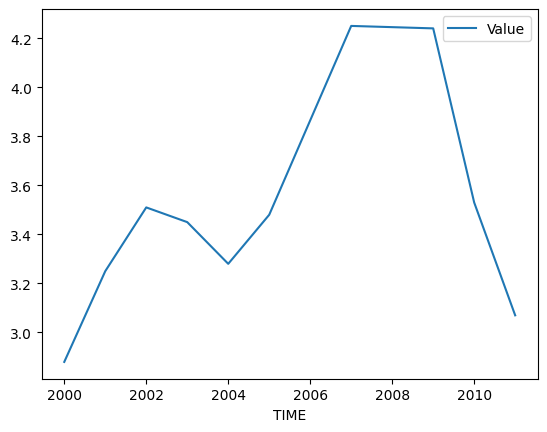

In [72]:
edu_clean_romania.plot(x = 'TIME', y = 'Value')

<Axes: xlabel='TIME'>

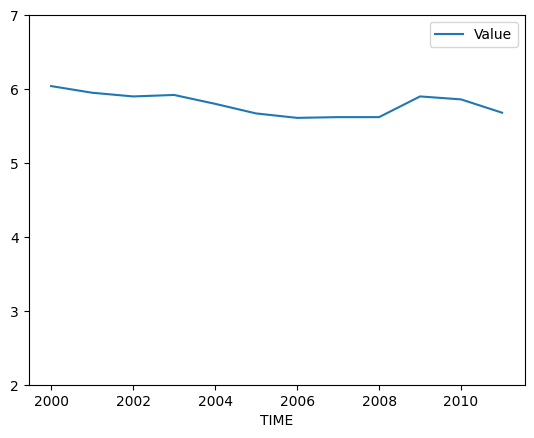

In [73]:
edu_clean_france.plot(x = 'TIME', y = 'Value', ylim = (2, 7))

Comparison:

Fluctuation:

Romania shows more volatility in its education spending compared to France, which maintains a more consistent level of expenditure over the years.

Peak and Drop:

Romania saw a sharp increase in spending between 2004 and 2008, followed by a significant drop post-2008. On the other hand, France shows a steadier trend with no drastic changes.

# Pivot

An alternative way to lookk at this data is to arrange it by the GEO column with one column per year. We can do this using the pivot method of the data frame and it makes the table of data much easier to read.

In [77]:
edu_clean_pivot = edu_clean.pivot(index = 'GEO', columns = 'TIME')
edu_clean_pivot

Value                    \
TIME                                              2000  2001  2002  2003   
GEO                                                                        
Austria                                           5.66  5.74  5.68  5.53   
Belgium                                            NaN  5.99  6.09  6.02   
Bulgaria                                          3.88  3.70  3.94  4.09   
Cyprus                                            5.42  5.98  6.60  7.37   
Czech Republic                                    3.83  3.93  4.15  4.32   
Denmark                                           8.28  8.44  8.44  8.33   
Estonia                                           5.57  5.24  5.47  5.29   
Euro area (13 countries)                           NaN  4.97  5.00  5.04   
Euro area (15 countries)                           NaN  4.98  5.01  5.04   
Euro area (17 countries)                           NaN   NaN  4.86  4.89   
Euro area (18 countries)                           NaN   NaN  4.87  4.89   
European Union (25 countries)                     4.94  5.02  5.03  5.06   
European Union (27 countries)                     4.91  4.99  5.00  5.04   
European Union (28 countries)                      NaN   NaN  5.00  5.03   
Finland                                           5.89  6.06  6.22  6.43   
France                                            6.04  5.95  5.90  5.92   
Germany (until 1990 former territory of the FRG)  4.45  4.51  4.72  4.74   
Greece                                            3.71  3.50  3.57  3.56   
Hungary                                           4.50  5.06  5.39  5.91   
Ireland                                           4.29  4.24  4.27  4.35   
Italy                                             4.52  4.83  4.60  4.72   
Latvia                                            5.64  7.22  6.60  5.58   
Lithuania                                         5.63  5.86  5.81  5.14   
Luxembourg                                         NaN  3.75  3.79  3.77   
Malta                                             4.52  4.27  4.22  4.48   
Netherlands                                       4.98  5.09  5.22  5.47   
Poland                                            4.87  5.42  5.41  5.35   
Portugal                                          5.42  5.39  5.33  5.38   
Romania                                           2.88  3.25  3.51  3.45   
Slovakia                                          3.92  3.99  4.31  4.30   
Slovenia                                           NaN  5.86  5.76  5.80   
Spain                                             4.28  4.24  4.25  4.28   

                                                                          \
TIME                                              2004  2005  2006  2007   
GEO                                                                        
Austria                                           5.48  5.44  5.40  5.33   
Belgium                                           5.95  5.92  5.98  6.00   
Bulgaria                                          4.40  4.25  4.04  3.88   
Cyprus                                            6.77  6.95  7.02  6.95   
Czech Republic                                    4.20  4.08  4.42  4.05   
Denmark                                           8.43  8.30  7.97  7.81   
Estonia                                           4.92  4.88  4.70  4.72   
Euro area (13 countries)                          4.95  4.89  4.87  4.80   
Euro area (15 countries)                          4.96  4.89  4.87  4.81   
Euro area (17 countries)                          4.80  4.72  4.69  4.79   
Euro area (18 countries)                          4.80  4.72  4.69  4.79   
European Union (25 countries)                     4.98  4.95  4.93  4.95   
European Union (27 countries)                     4.95  4.92  4.91  4.93   
European Union (28 countries)                     4.95  4.92  4.91  4.92   
Finland                                           6.42  6.30  6.18  5.90   
France              

<Axes: xlabel='GEO'>

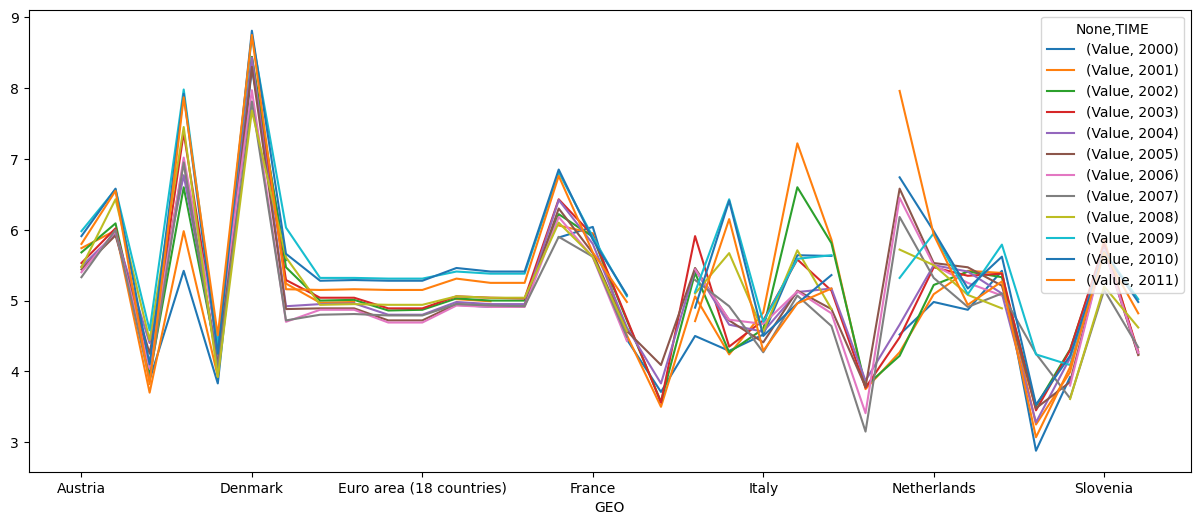

In [80]:
edu_clean_pivot.plot(figsize = (15, 6))

This is not useful.

so, to get more useful plot we can __transpose__ the data frame the rows and columns.

then plot it quite large(using the figsize argument to allow us to see the legend.

In [81]:
edu_clean_pivot.transpose().head()

GEO         Austria  Belgium  Bulgaria  Cyprus  Czech Republic  Denmark  \
      TIME                                                                
Value 2000     5.66      NaN      3.88    5.42            3.83     8.28   
      2001     5.74     5.99      3.70    5.98            3.93     8.44   
      2002     5.68     6.09      3.94    6.60            4.15     8.44   
      2003     5.53     6.02      4.09    7.37            4.32     8.33   
      2004     5.48     5.95      4.40    6.77            4.20     8.43   

GEO         Estonia  Euro area (13 countries)  Euro area (15 countries)  \
      TIME                                                                
Value 2000     5.57                       NaN                       NaN   
      2001     5.24                      4.97                      4.98   
      2002     5.47                      5.00                      5.01   
      2003     5.29                      5.04                      5.04   
      2004     4.92                      4.95                      4.96   

GEO         Euro area (17 countries)  ...  Lithuania  Luxembourg  Malta  \
      TIME                            ...                                 
Value 2000                       NaN  ...       5.63         NaN   4.52   
      2001                       NaN  ...       5.86        3.75   4.27   
      2002                      4.86  ...       5.81        3.79   4.22   
      2003                      4.89  ...       5.14        3.77   4.48   
      2004                      4.80  ...       5.17        3.87   4.66   

GEO         Netherlands  Poland  Portugal  Romania  Slovakia  Slovenia  Spain  
      TIME                                                                     
Value 2000         4.98    4.87      5.42     2.88      3.92       NaN   4.28  
      2001         5.09    5.42      5.39     3.25      3.99      5.86   4.24  
      2002         5.22    5.41      5.33     3.51      4.31      5.76   4.25  
      2003         5.47    5.35      5.38     3.45      4.30      5.80   4.28  
      2004         5.50    5.41      5.10     3.28      4.19      5.74   4.25  

[5 rows x 32 columns]

<Axes: xlabel='None,TIME'>

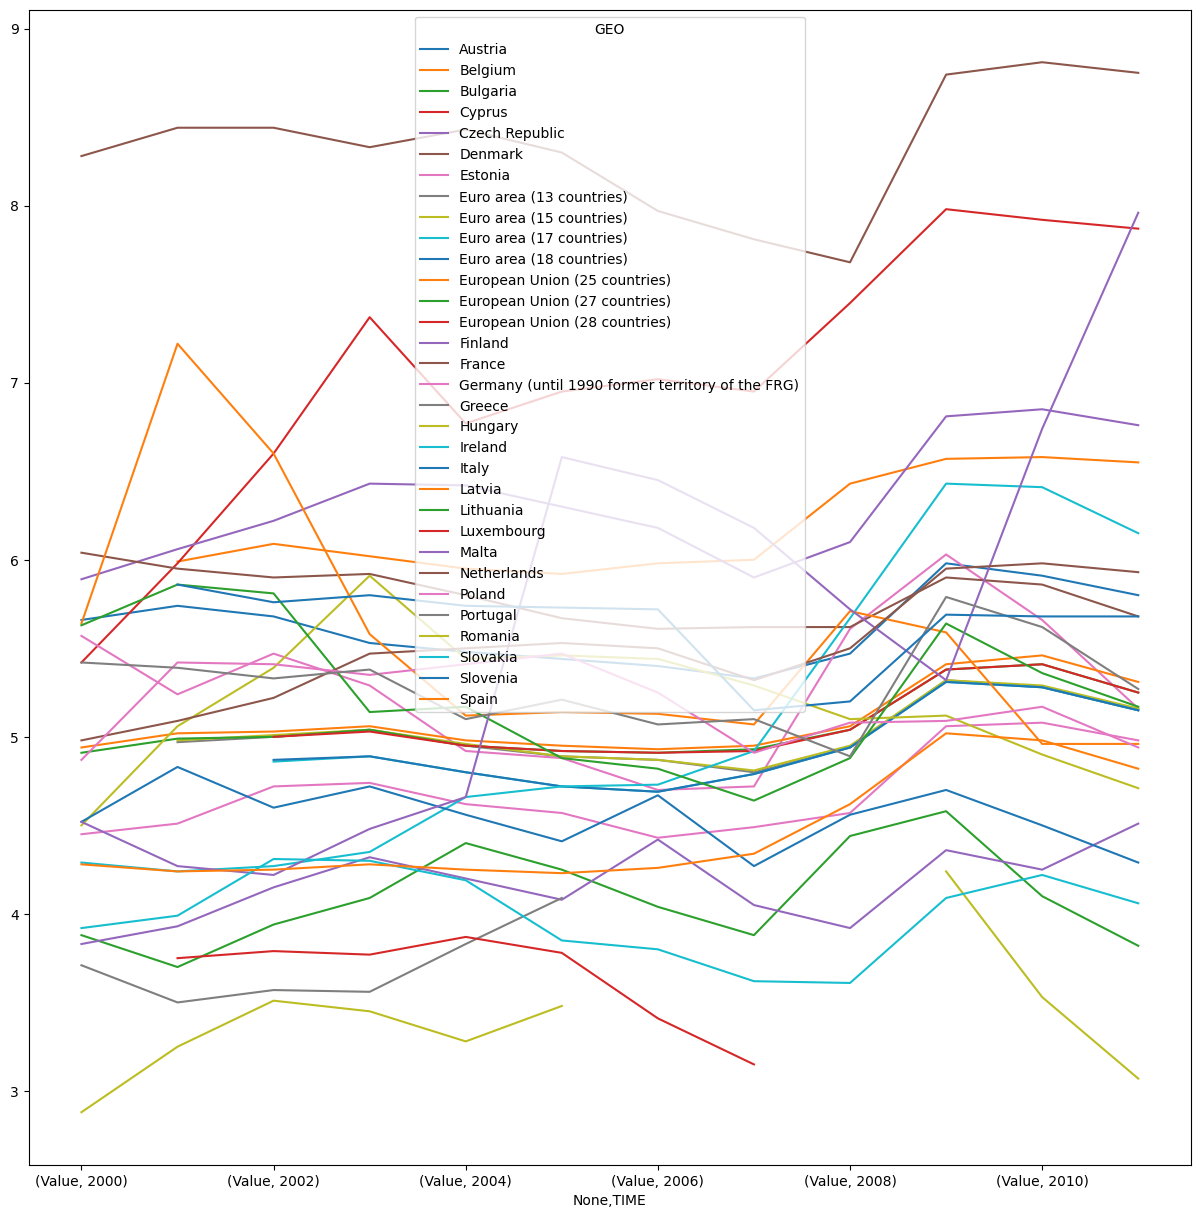

In [82]:
edu_clean_pivot.transpose().plot(figsize = (15, 15))

Unfortunately, this plot isn't that informative as it is difficult to see which country is which. The main thing we can see from this plot is that there are big differences between countires and some countries that have changed significantly over the reporting period